In [457]:
import pandas as pd

df = pd.read_csv("data10.csv")

df

,group,A,B,C,D,E,K,V
0,1,62,41,65,54,36,79,47
1,1,66,65,55,54,28,87,33
2,1,66,50,25,53,20,81,33
3,1,64,63,30,54,11,83,44
4,1,67,41,26,51,13,65,47
5,0,44,43,52,40,12,86,14
6,0,43,64,39,46,24,86,21
7,0,43,60,31,49,36,86,25
8,0,44,37,53,49,12,85,10
9,0,44,57,51,45,31,62,16


In [458]:
headers = df.columns
headers_len = len(headers)
indexes_indicators = [ i for i in range(1, headers_len)]
indicators = df.take(indexes_indicators, axis=1)

# headers, headers_len, indexes_indicators

indicators

,A,B,C,D,E,K,V
0,62,41,65,54,36,79,47
1,66,65,55,54,28,87,33
2,66,50,25,53,20,81,33
3,64,63,30,54,11,83,44
4,67,41,26,51,13,65,47
5,44,43,52,40,12,86,14
6,43,64,39,46,24,86,21
7,43,60,31,49,36,86,25
8,44,37,53,49,12,85,10
9,44,57,51,45,31,62,16


## Шаг№1. 
Преобразование значений каждого показателя в относительные единицы (по отношению к среднему значению показателя по совокупности физлиц

In [559]:
base = df.copy()

# Нахождение максимальных, минимальных и относительных
# значений по всей совокупности показателей
for (index, col) in enumerate(headers[1:]):
    base[f"{col}_max"] = df[col].mean()
    base[f"{col}_relative"] = df[col] / base[f"{col}_max"]

In [560]:
important_indicators = []

for (index, col) in enumerate(headers[1:]):

    base[f"{col}_decile"] = pd.cut(base[f"{col}_relative"].sort_values(), 10, labels=False, duplicates="drop",)
    decile_9_group_1 = len(base[(base[f"{col}_decile"] == 9) & (base["group"] == 1)])
    decile_9_group_0 = len(base[(base[f"{col}_decile"] == 9) & (base["group"] == 0)])

    weight_percent = ((decile_9_group_1 + decile_9_group_0) / 100)

    if decile_9_group_1 / weight_percent > 70:
        important_indicators.append(col)

base
# important_indicators

,group,A,B,C,D,E,K,V,A_max,A_relative,...,K_relative,V_max,V_relative,A_decile,B_decile,C_decile,D_decile,E_decile,K_decile,V_decile
0,1,62,41,65,54,36,79,47,54.3,1.141805,...,0.9875,29.0,1.620690,7,1,9,9,9,6,9
1,1,66,65,55,54,28,87,33,54.3,1.215470,...,1.0875,29.0,1.137931,9,9,7,9,6,9,6
2,1,66,50,25,53,20,81,33,54.3,1.215470,...,1.0125,29.0,1.137931,9,4,0,9,3,7,6
3,1,64,63,30,54,11,83,44,54.3,1.178637,...,1.0375,29.0,1.517241,8,9,1,9,0,8,9
4,1,67,41,26,51,13,65,47,54.3,1.233886,...,0.8125,29.0,1.620690,9,1,0,7,0,1,9
5,0,44,43,52,40,12,86,14,54.3,0.810313,...,1.0750,29.0,0.482759,0,2,6,0,0,9,1
6,0,43,64,39,46,24,86,21,54.3,0.791897,...,1.0750,29.0,0.724138,0,9,3,4,5,9,2
7,0,43,60,31,49,36,86,25,54.3,0.791897,...,1.0750,29.0,0.862069,0,8,1,6,9,9,4
8,0,44,37,53,49,12,85,10,54.3,0.810313,...,1.0625,29.0,0.344828,0,0,6,6,0,9,0
9,0,44,57,51,45,31,62,16,54.3,0.810313,...,0.7750,29.0,0.551724,0,7,6,3,7,0,1


In [548]:
base[["A_decile","B_decile","C_decile","D_decile","E_decile","K_decile","V_decile"]]

,A_decile,B_decile,C_decile,D_decile,E_decile,K_decile,V_decile
0,7,1,9,9,9,6,9
1,9,9,7,9,6,9,6
2,9,4,0,9,3,7,6
3,8,9,1,9,0,8,9
4,9,1,0,7,0,1,9
5,0,2,6,0,0,9,1
6,0,9,3,4,5,9,2
7,0,8,1,6,9,9,4
8,0,0,6,6,0,9,0
9,0,7,6,3,7,0,1


In [549]:

matrix = pd.DataFrame()

for (index, col) in enumerate(headers[1:]):
    matrix[col] = [1 if x == 9 else 0 for x in base[f"{col}_decile"]]

matrix



,A,B,C,D,E,K,V
0,0,0,1,1,1,0,1
1,1,1,0,1,0,1,0
2,1,0,0,1,0,0,0
3,0,1,0,1,0,0,1
4,1,0,0,0,0,0,1
5,0,0,0,0,0,1,0
6,0,1,0,0,0,1,0
7,0,0,0,0,1,1,0
8,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0


In [550]:
from src.core.sys_analysis import FunctionalCompleteness
r = FunctionalCompleteness(matrix.to_numpy().transpose().tolist()).calculate(e_p=1.0, e_s=0.1, e_h=0.7, e_g=0.5)
r

{'P01': Matrix (7, 7),
 'P10': Matrix (7, 7),
 'P11': Matrix (7, 7),
 'SMatrix': Matrix (7, 7),
 'HMatrix': Matrix (7, 7),
 'GMatrix': Matrix (7, 7),
 'P0Matrix': Matrix (7, 7),
 'S0Matrix': Matrix (7, 7),
 'H0Matrix': Matrix (7, 7),
 'G0Matrix': Matrix (7, 7),
 'full_absorption_matrix': Matrix (7, 8)}

In [551]:
P01 = pd.DataFrame(r["P01"].get_matrix())
P01

,0,1,2,3,4,5,6
0,0,2,1,2,2,4,2
1,2,0,1,2,2,3,2
2,3,3,0,3,1,5,2
3,1,1,0,0,1,4,1
4,3,3,0,3,0,4,2
5,2,1,1,3,1,0,3
6,2,2,0,2,1,5,0


In [552]:
full_absorption_matrix = pd.DataFrame(r["full_absorption_matrix"].get_matrix())
full_absorption_matrix

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1


In [561]:
H = r["HMatrix"].get_matrix()
h_df = pd.DataFrame(H)

h_df

,0,1,2,3,4,5,6
0,1.000,0.333,0.000,0.667,0.000,0.333,0.333
1,0.333,1.000,0.000,0.667,0.000,0.667,0.333
2,0.000,0.000,1.000,1.000,1.000,0.000,1.000
3,0.500,0.500,0.250,1.000,0.250,0.250,0.500
4,0.000,0.000,0.500,0.500,1.000,0.500,0.500
5,0.200,0.400,0.000,0.200,0.200,1.000,0.000
6,0.333,0.333,0.333,0.667,0.333,0.000,1.000


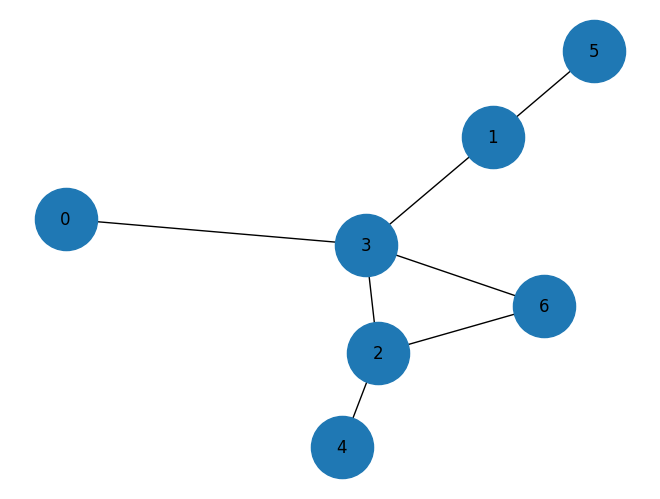

In [558]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# def draw_labeled_multigraph(G, attr_name, ax=None):
#     """
#     Length of connectionstyle must be at least that of a maximum number of edges
#     between pair of nodes. This number is maximum one-sided connections
#     for directed graph and maximum total connections for undirected graph.
#     """
#     # Works with arc3 and angle3 connectionstyles
#     # connectionstyle = [f"arc3,rad={r}" for r in it.accumulate([0.15] * 4)]
#     # connectionstyle = [f"angle3,angleA={r}" for r in it.accumulate([30] * 4)]

#     pos = nx.shell_layout(G)
#     nx.draw_networkx_nodes(G, pos, ax=ax)
#     nx.draw_networkx_labels(G, pos, font_size=20, ax=ax)
#     nx.draw_networkx_edges(
#         G, pos, edge_color="grey",  ax=ax
#     )

#     labels = {
#         tuple(edge): f"{attr_name}={attrs[attr_name]}"
#         for *edge, attrs in G.edges(keys=True, data=True)
#     }
#     nx.draw_networkx_edge_labels(
#         G,
#         pos,
#         labels,
#         label_pos=0.3,
#         font_color="black",
#         bbox={"alpha": 0},
#         ax=ax,
#     )


for i in range(len(H)):
    for j in range(len(H[i])):
        if i != j:
            if H[i][j] > 0.5:
                G.add_edge(f"{i}",f"{j}")
            else:
                G.add_node(f"{i}")

# draw_labeled_multigraph(G, "w")

# nx.draw_networkx_edge_labels(G)
nx.draw(G, node_size=2000, with_labels=True, )
plt.show()